In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
from sklearn.linear_model import LinearRegression

In [6]:
f = pd.read_excel('./Data/가공완료/[따릉이_확진]월별증감.xlsx', index_col='Unnamed: 0')
f

,월,증감,확진자증감
0,2020-03,771261,0
1,2020-04,623855,7
2,2020-05,322940,221
3,2020-06,290528,223
4,2020-07,-188347,-163
5,2020-08,-848538,1979
6,2020-09,1078017,-843
7,2020-10,79628,-705
8,2020-11,-901548,2083
9,2020-12,-793761,7407


# 따릉이일자별 -> 월별 스케일링

In [3]:
ss = pd.read_excel('./Data/가공완료/[따릉이]일자별대여건수(2015~).xlsx', index_col='Unnamed: 0')
ss

,대여일자,대여건수
0,2015-09-19,724
1,2015-09-20,907
2,2015-09-21,553
3,2015-09-22,796
4,2015-09-23,804
...,...,...
2438,2021-12-27,42521
2439,2021-12-28,51268
2440,2021-12-29,52017
2441,2021-12-30,48993


In [4]:
ss['월'] = ss['대여일자']
for i in range(len(ss)):
    ss['월'][i] = ss['대여일자'][i][:7]

C:\Users\sec\AppData\Local\Temp\ipykernel_1644\1805409998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['월'][i] = ss['대여일자'][i][:7]


### 따릉이 월별로 스케일링

In [5]:
ss_gr = ss.groupby('월')['대여건수'].median()
ss_gr = pd.DataFrame(ss_gr).reset_index()
ff = ss_gr
ff

,월,대여건수
0,2015-09,872.5
1,2015-10,1354.0
2,2015-11,1353.0
3,2015-12,683.0
4,2016-01,594.0
...,...,...
71,2021-08,117873.0
72,2021-09,138434.0
73,2021-10,116818.0
74,2021-11,92541.0


In [188]:
ss_gr = ss.groupby('월')['대여건수'].sum()
ss_gr = pd.DataFrame(ss_gr).reset_index()
ff = ss_gr

In [127]:
ff = pd.read_excel('./Data/가공완료/[따릉이]월별대여건수(2015~).xlsx', index_col='Unnamed: 0')
ff

,월,대여건수
0,2015-09,11603
1,2015-10,41015
2,2015-11,38125
3,2015-12,22965
4,2016-01,18209
...,...,...
43,2021-08,3245974
44,2021-09,3736657
45,2021-10,3445929
46,2021-11,2737291


### 스케일링별 데이터 정리

In [83]:
mon = ['01','02','03','04','05','06','07','08','09','10','11','12']
by16 = ff[4:16].reset_index(drop=True)
by17 = ff[16:28].reset_index(drop=True)
by18 = ff[28:40].reset_index(drop=True)
by19 = ff[40:52].reset_index(drop=True)
by20 = ff[52:64].reset_index(drop=True)
by21 = ff[64:].reset_index(drop=True)


In [84]:
alls = pd.concat([by16,by17,by18,by19,by20,by21], axis=1).drop('월', axis=1)
alls.columns = ['2016','2017','2018','2019','2020','2021']
alls.index = range(1, 13, 1)
alls

,2016,2017,2018,2019,2020,2021
1,594.0,2702.0,4950.0,16344.0,28391.0,23631.0
2,629.0,3077.5,5967.5,17288.5,26540.0,41333.0
3,1692.0,6300.0,14914.0,28653.0,47633.0,73254.0
4,2930.5,11360.5,25795.5,52991.0,73533.5,110570.0
5,3355.0,15488.0,35975.0,74960.0,89149.0,114851.0
6,3745.5,19431.0,42401.5,81181.5,100939.5,121406.5
7,3985.0,14039.0,38003.0,74259.0,95705.0,113329.0
8,6507.0,18392.0,32216.0,67510.0,52904.0,117873.0
9,10706.5,30206.5,51865.0,86676.0,108989.5,138434.0
10,11290.0,29072.0,49503.0,84368.0,94840.0,116818.0


In [204]:
alls.to_excel('./Data/가공완료/[따릉이]연도별시각화자료.xlsx')

In [8]:
from sklearn.preprocessing import normalize, minmax_scale

In [9]:
all_scale = minmax_scale(alls)
all_sc = pd.DataFrame(all_scale)
all_sc.columns = ['2016','2017','2018','2019','2020','2021']
all_sc.index = range(1, 13, 1)
all_sc

,2016,2017,2018,2019,2020,2021
1,0.000000,0.000000,0.000000,0.000000,0.022450,0.000000
2,0.003272,0.013652,0.021688,0.013429,0.000000,0.154195
3,0.102655,0.130815,0.212384,0.175013,0.255829,0.432245
4,0.218446,0.314803,0.444325,0.521057,0.569967,0.757289
5,0.258134,0.464869,0.661302,0.833419,0.759362,0.794579
6,0.294643,0.608228,0.798284,0.921878,0.902364,0.851681
7,0.317034,0.412187,0.704529,0.823452,0.838877,0.781321
8,0.552823,0.570452,0.581179,0.727492,0.319759,0.820902
9,0.945447,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.000000,0.958752,0.949654,0.967184,0.828386,0.811712


- 코로나 이전.이후 데이터 분할

In [203]:
all_sc1619 = all_sc[['2016','2017','2018','2019']]
all_sc2021 = all_sc[['2020','2021']]

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
rc('font', family = 'malgun gothic')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

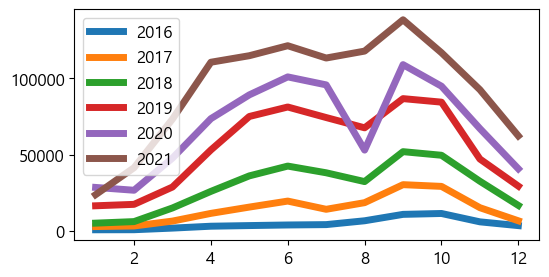

In [85]:
plt.figure(figsize = (12,8))
alls.plot() # 대여수.median
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

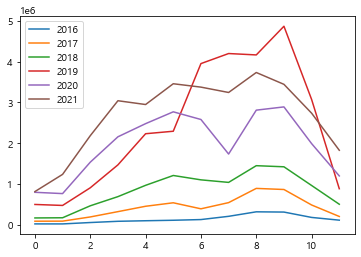

In [172]:
plt.figure(figsize = (12,8))
alls.plot() # 대여수.sum()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

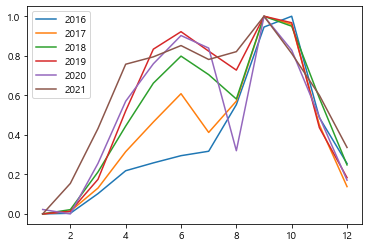

In [187]:
plt.figure(figsize = (12,8))
all_sc.plot() # 대여수.median.scale
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

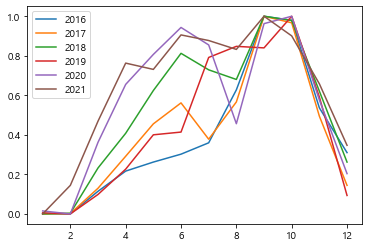

In [193]:
plt.figure(figsize = (12,8))
all_sc.plot() # 대여수.sum.scale
plt.legend()
plt.show

# 코로나 이전- 이후 스케일 그래프

- 이전

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

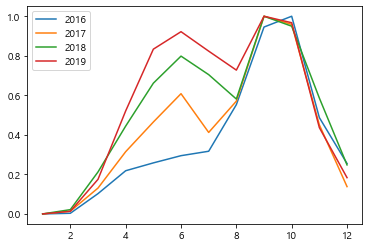

In [181]:
plt.figure(figsize = (12,8))
all_sc1619.plot() # median.scale
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

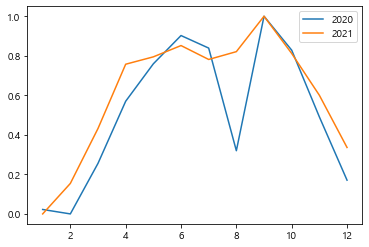

In [182]:
plt.figure(figsize = (12,8))
all_sc2021.plot()# median.scale
plt.legend()
plt.show

- 이후

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

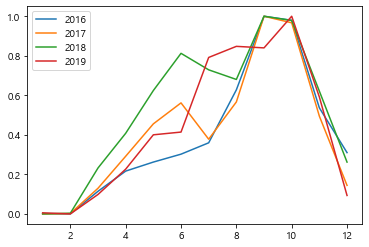

In [194]:
plt.figure(figsize = (12,8))
all_sc1619.plot() # sum.scale
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

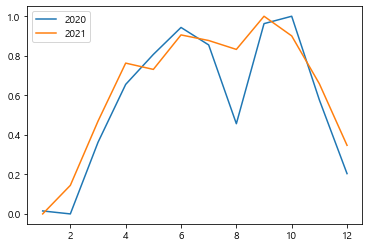

In [195]:
plt.figure(figsize = (12,8))
all_sc2021.plot()# sum.scale
plt.legend()
plt.show

In [54]:
alls7_9 = alls[5:10]
alls7_9

,2016,2017,2018,2019,2020,2021
6,3745.5,19431.0,42401.5,81181.5,100939.5,121406.5
7,3985.0,14039.0,38003.0,74259.0,95705.0,113329.0
8,6507.0,18392.0,32216.0,67510.0,52904.0,117873.0
9,10706.5,30206.5,51865.0,86676.0,108989.5,138434.0
10,11290.0,29072.0,49503.0,84368.0,94840.0,116818.0


In [50]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
rc('font', family = 'malgun gothic')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

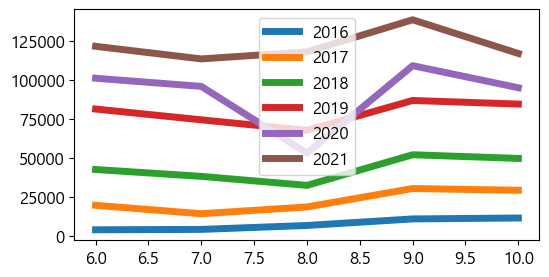

In [55]:
plt.figure(figsize = (12,8))
alls7_9.plot()
plt.legend()
plt.show

In [73]:
allt = alls.T
allt_1 = allt-allt.shift()
allt_2 = pd.DataFrame(minmax_scale(allt_1))
allt_3 = allt_2.T
# allt_2 = allt_1.T
allt_3 = allt_3.drop(0, axis=1)
allt_3

,1,2,3,4,5
0,0.408639,0.416969,0.961147,1.000000,0.000000
1,0.000000,0.035765,0.718741,0.551096,1.000000
2,0.000000,0.190644,0.434541,0.683958,1.000000
3,0.000000,0.209917,0.655987,0.423418,1.000000
4,0.000000,0.311113,1.000000,0.076568,0.505325
5,0.000000,0.315443,1.000000,0.176341,0.207041
6,0.000000,0.530876,1.000000,0.434776,0.288909
7,0.332906,0.357273,0.627081,0.000000,1.000000
8,0.000000,0.140977,1.000000,0.183757,0.649500
9,0.299676,0.408273,1.000000,0.000000,0.471693


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

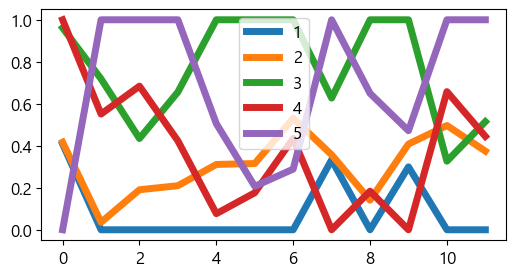

In [74]:
plt.figure(figsize = (12,8))
allt_3.plot()
plt.legend()
plt.show

# 정규분포그리기??

In [36]:
import matplotlib.pyplot as plt
from scipy.special import erf

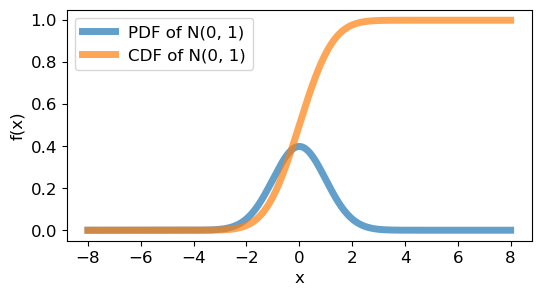

In [41]:
np.random.seed(0)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

mu = 0.0 # 평균
sigma = 1.0 # 표준편차

x = np.linspace(-8, 8, 1000)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))
y_cum = 0.5 * (1 + erf((x - mu)/(np.sqrt(2 * sigma**2))))

plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.plot(x, y_cum, alpha=0.7, label='CDF of N(0, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

# TRY

In [ ]:
by16 = ff[4:16].reset_index(drop=True)
by17 = ff[16:28].reset_index(drop=True)
by18 = ff[28:40].reset_index(drop=True)
by19 = ff[40:52].reset_index(drop=True)
by20 = ff[52:64].reset_index(drop=True)
by21 = ff[64:].reset_index(drop=True)

In [ ]:
by18

# 회귀 ??

In [88]:
lm2 = LinearRegression(fit_intercept=True) 

In [89]:
list = ['2016','2017','2018','2019','2020','2021']

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from xgboost import XGBRegressor, plot_tree, plot_importance

from sklearn.model_selection import GridSearchCV

In [124]:
! pip install xgboost